In [213]:
%pip install seaborn

In [214]:
import numpy as np
import pandas as pd
# Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

# accuracy, precision etc.
from sklearn.metrics import accuracy_score, precision_score, f1_score

# used while tuning the model
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [215]:
# load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Display Data & shape(dims)

In [216]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [217]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [218]:
print(f"The shape of the training dataset is : {train.shape}")
print(f"The shape of the testing dataset is : {test.shape}")

The shape of the training dataset is : (16067, 7)
The shape of the testing dataset is : (9914, 6)


In [219]:
# printing datatypes for avoiding any Value errors
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [220]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [221]:
train.describe

<bound method NDFrame.describe of       fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0             4.5  2009-06-15 17:26:21 UTC        -73.844311        40.721319   
1            16.9  2010-01-05 16:52:16 UTC        -74.016048        40.711303   
2             5.7  2011-08-18 00:35:00 UTC        -73.982738        40.761270   
3             7.7  2012-04-21 04:30:42 UTC        -73.987130        40.733143   
4             5.3  2010-03-09 07:51:00 UTC        -73.968095        40.768008   
...           ...                      ...               ...              ...   
16062         6.5  2014-12-12 07:41:00 UTC        -74.008820        40.718757   
16063        16.1  2009-07-13 07:58:00 UTC        -73.981310        40.781695   
16064         8.5  2009-11-11 11:19:07 UTC        -73.972507        40.753417   
16065         8.1  2010-05-11 23:53:00 UTC        -73.957027        40.765945   
16066         8.5  2011-12-14 06:24:33 UTC        -74.002111        40.7297

In [222]:
test.describe

<bound method NDFrame.describe of               pickup_datetime  pickup_longitude  pickup_latitude  \
0     2015-01-27 13:08:24 UTC        -73.973320        40.763805   
1     2015-01-27 13:08:24 UTC        -73.986862        40.719383   
2     2011-10-08 11:53:44 UTC        -73.982524        40.751260   
3     2012-12-01 21:12:12 UTC        -73.981160        40.767807   
4     2012-12-01 21:12:12 UTC        -73.966046        40.789775   
...                       ...               ...              ...   
9909  2015-05-10 12:37:51 UTC        -73.968124        40.796997   
9910  2015-01-12 17:05:51 UTC        -73.945511        40.803600   
9911  2015-04-19 20:44:15 UTC        -73.991600        40.726608   
9912  2015-01-31 01:05:19 UTC        -73.985573        40.735432   
9913  2015-01-18 14:06:23 UTC        -73.988022        40.754070   

      dropoff_longitude  dropoff_latitude  passenger_count  
0            -73.981430         40.743835                1  
1            -73.998886    

# Data Cleaning

In [223]:
# Fare amount in training dataset is of object data type changing it to float
train['fare_amount'] = pd.to_numeric(train['fare_amount'], errors = 'coerce')
# coerce will replace all non-numeric values to NaN

In [224]:
train.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [225]:
train.shape

(16067, 7)

In [226]:
train.dropna(subset = ['pickup_datetime'])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [227]:
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], errors = 'coerce', format='%Y-%m-%d %H:%M:%S UTC')
# make invalid datetimes to NAT by using errors = 'coerce' or there'll be key value error.

In [228]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [229]:
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [230]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [231]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [232]:
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [233]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

### Data Inconsistencies
1. Passenger count shouldn't exceed 6.
2. Range of latitueds [-90, 90] & longitudes [-180, 180]
3. Missing & High values of passenger count & fares (so remove them).

In [234]:
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [235]:
train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [236]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [237]:
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [238]:
train["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [239]:
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(15934, 13)
0


In [240]:
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape

(15933, 13)

In [241]:
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15933, dtype: float64

In [242]:

Counter(train["fare_amount"]<0)

Counter({False: 15930, True: 3})

In [243]:
train = train.drop(train[train["fare_amount"] <= 1].index, axis=0)
train.shape

(15928, 13)

In [244]:
train["fare_amount"].min()

1.14

In [245]:
train['fare_amount'].sort_values(ascending = False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15928, dtype: float64

In [246]:
train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(15926, 13)

In [247]:
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(15902, 13)
0


In [248]:
train["fare_amount"].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

**_Drop the rows with pickup and dropoff latitudes and longitudes falling out of range._**

### Dropping "pickup" latitudes & longitudes out of range.

In [249]:
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)
train = train.drop((train[train['pickup_longitude']<-180]).index, axis = 0)
train = train.drop((train[train['pickup_longitude']>180]).index, axis = 0)

### Dropping "dropoff" latitudes & longitudes out of range.

In [250]:
train = train.drop((train[train['dropoff_latitude']<-90]).index, axis=0)
train = train.drop((train[train['dropoff_latitude']>90]).index, axis=0)
train = train.drop((train[train['dropoff_longitude']<-180]).index, axis = 0)
train = train.drop((train[train['dropoff_longitude']>180]).index, axis = 0)

In [251]:
train.shape

(15901, 13)

In [252]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [253]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

# Calculating Distance (_Haversine Formula_)

In [254]:
from math import sin, cos, asin, sqrt, radians

def greatCircleDistance(x1, y1, x2, y2):
    longitude_dist = x2 - x1
    latitude_dist = y2 - y1
    a = sin(latitude_dist/2)**2 + cos(y1) * cos(y2) * sin(longitude_dist/2)**2
    c =  2 * asin(sqrt(a))
    km = c * 6371 # Since radius of earth is 6731 Km we'll be using it so, that our ans turns out to be in kilometers
    return km

def changeQuantities(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]

    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    distance = greatCircleDistance(lon1, lat1, lon2, lat2)
    return distance

**Here**
x1 = longitude of pickup location.
x2 = longitude of dropoff location.
y1 = latitude of pickup location.
y2 = latitude of dropoff location.

In [255]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(changeQuantities, axis = 1)
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(changeQuantities, axis = 1)

In [256]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [257]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [258]:
train.nunique()

fare_amount            459
pickup_datetime      15856
pickup_longitude     13672
pickup_latitude      14110
dropoff_longitude    13763
dropoff_latitude     14136
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15448
dtype: int64

In [259]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [260]:
train['distance'].sort_values(ascending = False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
8982        0.000000
7009        0.000000
4769        0.000000
3711        0.000000
12478       0.000000
Name: distance, Length: 15901, dtype: float64

In [261]:
Counter(train['distance'] == 0)

Counter({False: 15447, True: 454})

In [262]:
Counter(train['fare_amount'] == 0)

Counter({False: 15901})

In [263]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [264]:
train = train.drop(train[train['distance'] == 0].index, axis = 0)
train = train.drop(train[train['distance'] > 130 ].index, axis = 0)
train.shape

(15424, 14)

_Removed the rows where the distance is < 0 and > 130 making it the lowset and highest possible range a taxi can be allowed._(those are outliers).

#### We converted datetime to year, month, date, day and hour. so, we can drop the 'pickup_datetime' column.
#### We can also drop longitudes and latitudes since, we have already calculated the distances.

In [265]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [266]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [267]:
train.dtypes

fare_amount        float64
passenger_count    float64
year               float64
Month              float64
Date               float64
Day                float64
Hour               float64
distance           float64
dtype: object

*Change into suitable data types.*

In [268]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [269]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [270]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [271]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [272]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [273]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

# Data Visualization
Effects of various factors on fares, these include:-
1. Number of passengers.
2. Pickup date and time.
3. Day of the week.
4. Distance.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

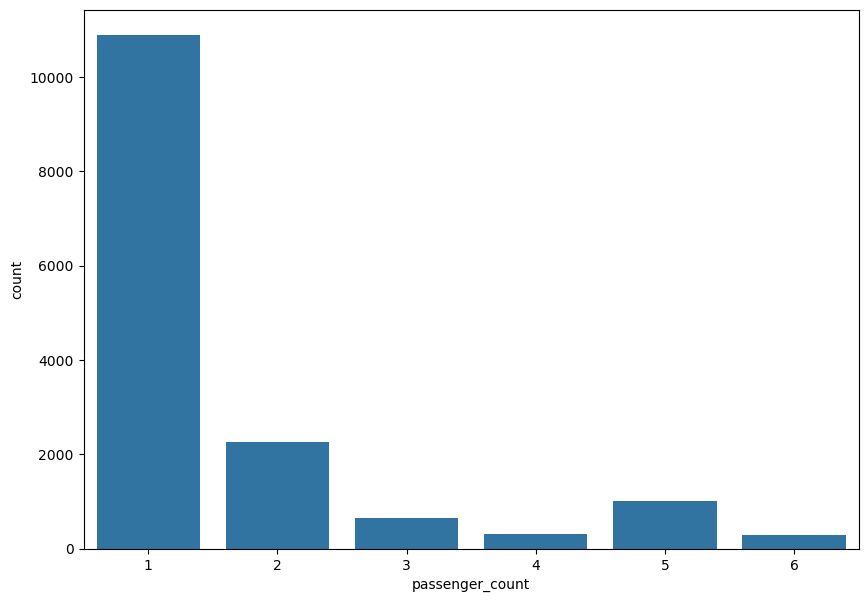

In [274]:
plt.figure(figsize=(10,7))
sns.countplot(x="passenger_count", data=train)

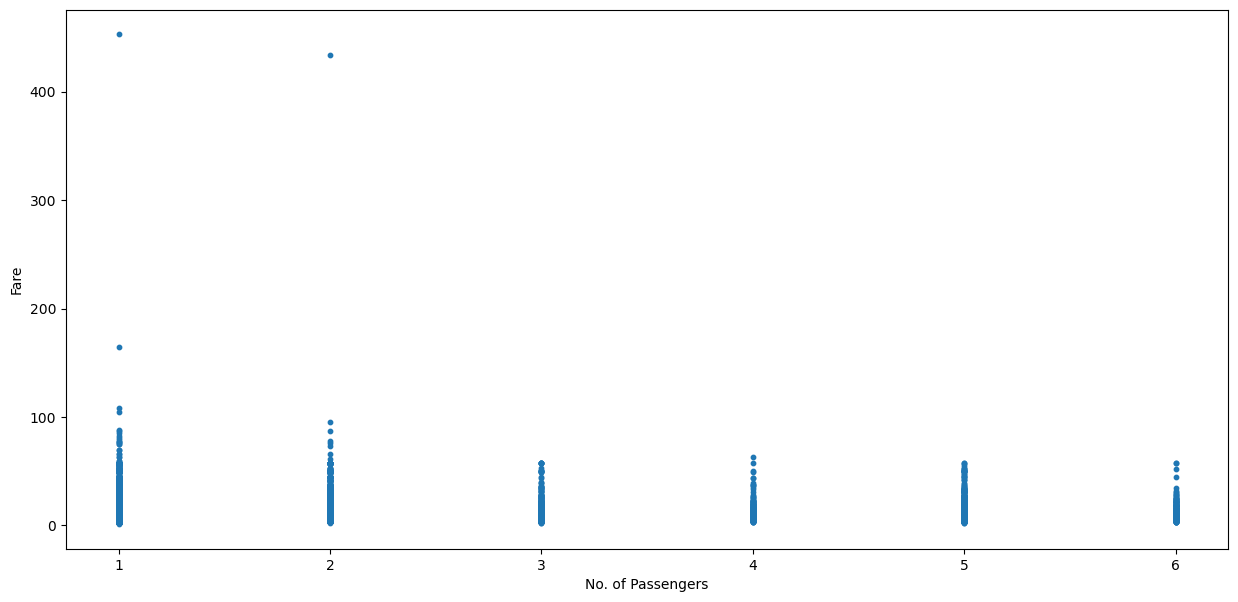

In [275]:
# Relationship between number of passengers and fares.
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

### No. of passengers and fares Observations
1. When number of passengers are 1 or 2 then the fares were at high.
2. At the same time, most frequent travellers are the ones travelling alone or as a pair.

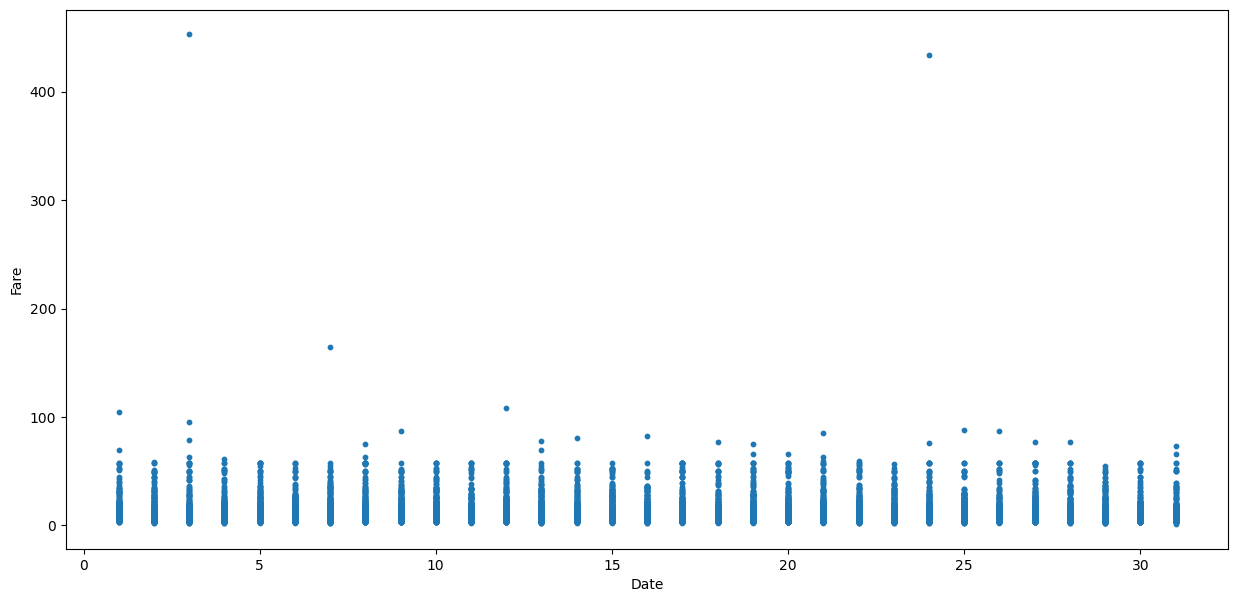

In [276]:
# Relationship b/w date and fare.
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

### Observations Date and fares:
There isn't much of impact on fares w.r.t dates.

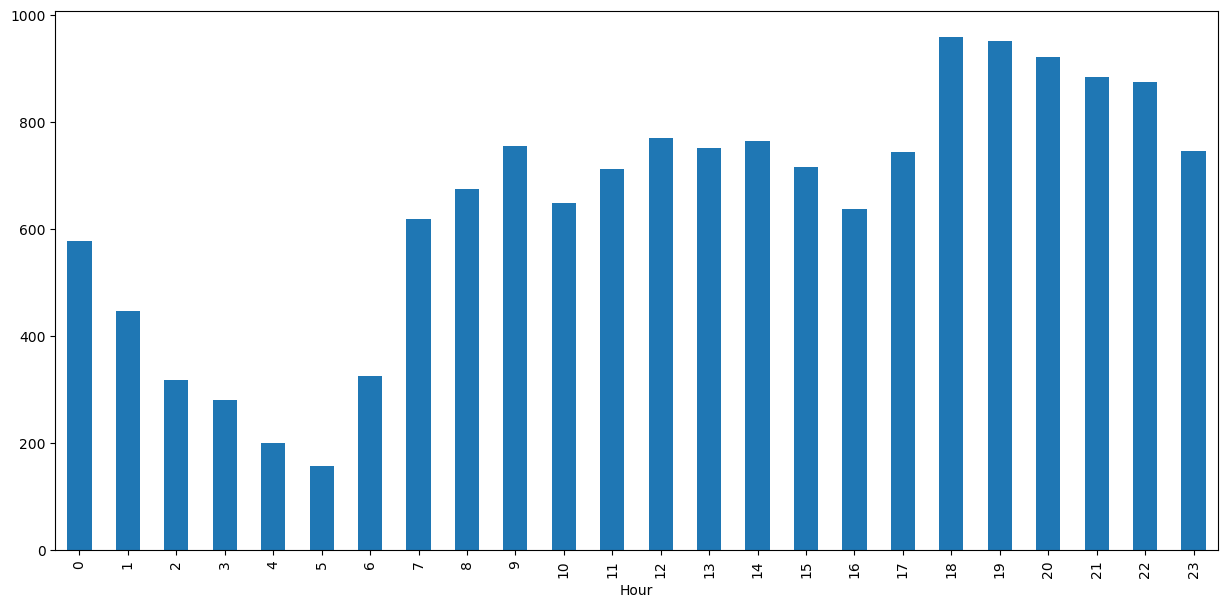

In [277]:
# Relationship between time and fares.
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

### Time & bookings obseravations:
The fares are high at evening hours, i.e during 18:00 (06:00 PM)

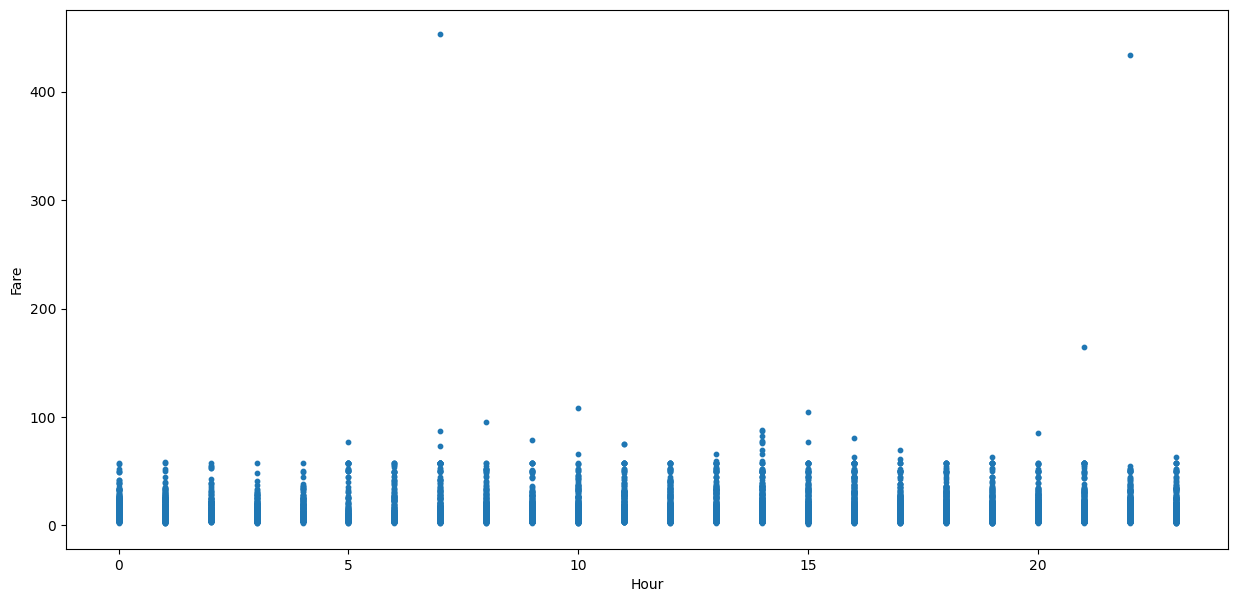

In [278]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

### Time and fares observations:
At 7 AM and 11 PM cabs are the costliest.

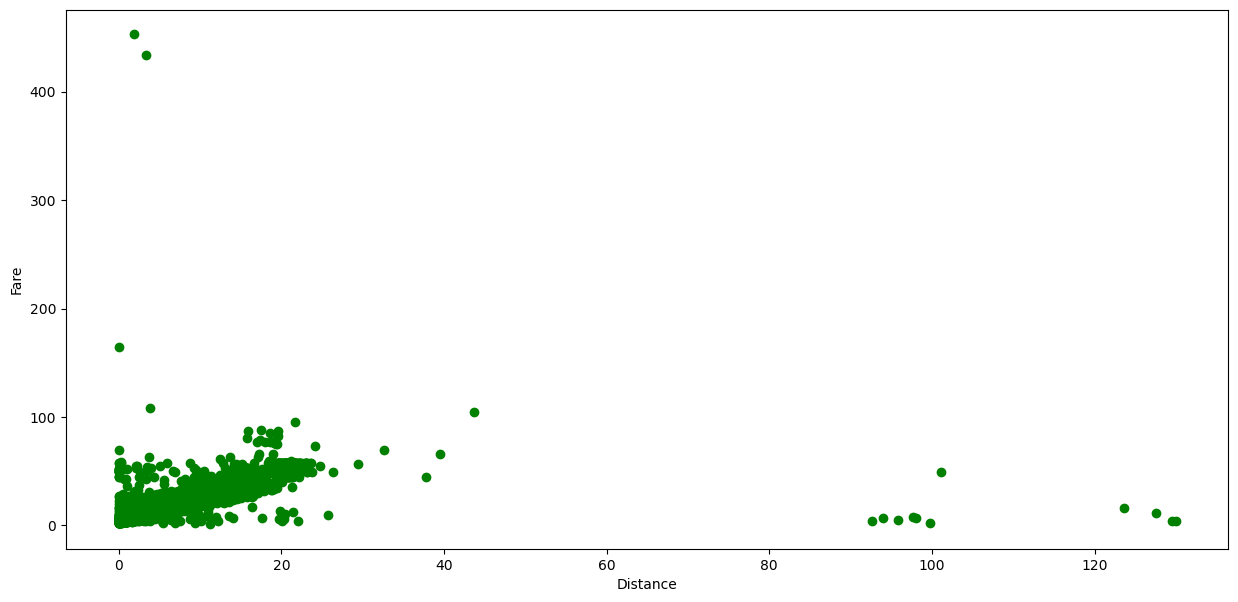

In [279]:
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

### The relationship b/w distance and fares.

# Feature Scaling:

fare_amount


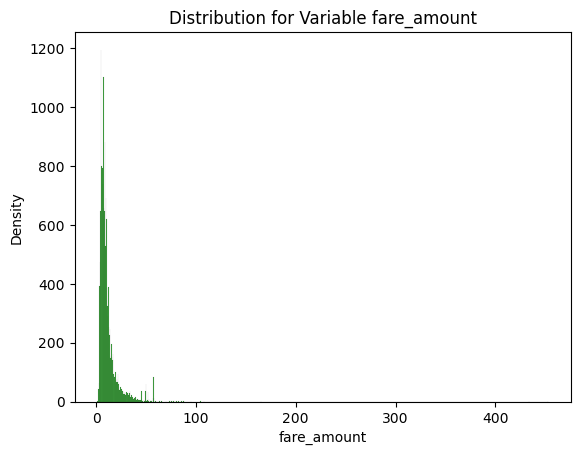

distance


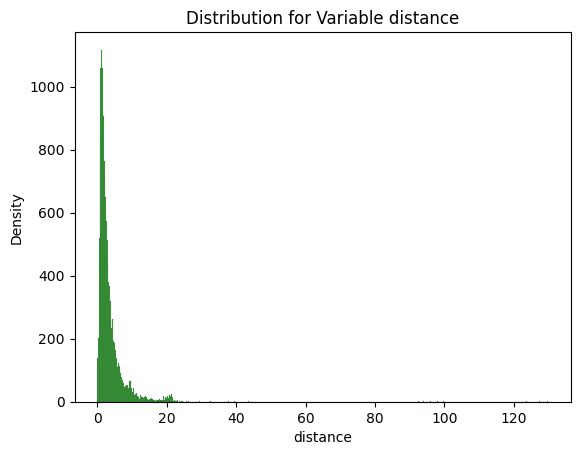

In [280]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.histplot(train[i], bins = 'auto',color = 'green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

### Observations of distribution (uniform or non-uniform) for train data:
* High Skewness

In [281]:
train['fare_amount'] = np.log1p(train['fare_amount'])
train['distance'] = np.log1p(train['distance'])

fare_amount


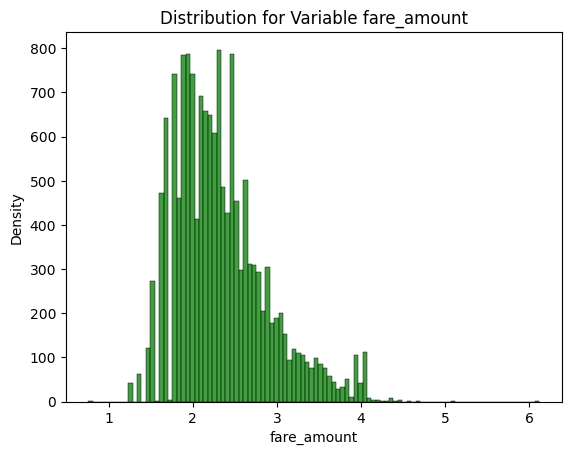

distance


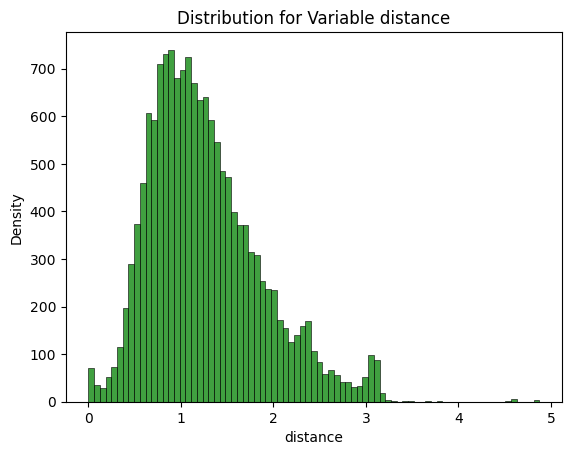

In [282]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.histplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

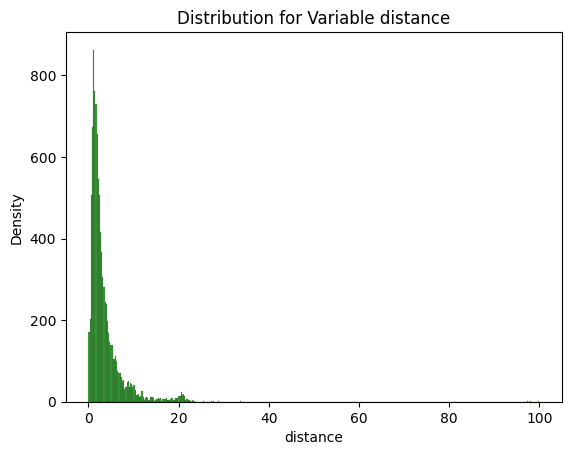

In [283]:
sns.histplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [284]:
test['distance'] = np.log1p(test['distance'])

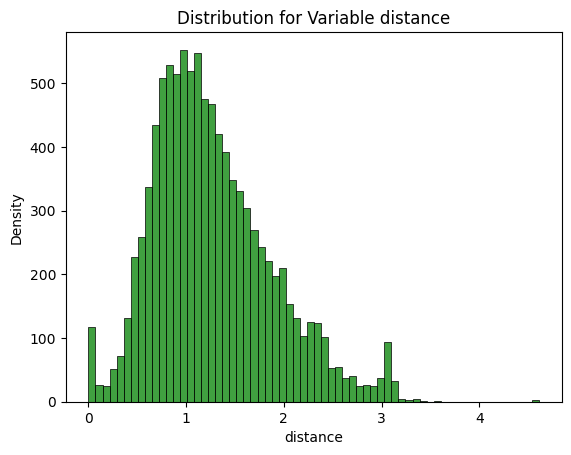

In [285]:
sns.histplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# Model Using Random Forest

In [286]:
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [287]:
print(f"The shape of X_train is : {X_train.shape}")
print(f"The shape of y_train is : {y_train.shape}")

The shape of X_train is : (12339, 7)
The shape of y_train is : (12339,)


In [288]:
print(f"The shape of X_test is : {X_test.shape}")
print(f"The shape of y_test is : {y_test.shape}")

The shape of X_test is : (3085, 7)
The shape of y_test is : (3085,)


In [289]:
regressor_rf = RandomForestRegressor(n_estimators = 200)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [290]:
# prediction on training dataset
train_pred = regressor_rf.predict(X_train)
# prediction on test dataset
test_pred = regressor_rf.predict(X_test)

### Root Mean Squared Error(RMSE)

In [291]:
# RMSE for train data
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred)) 
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

In [292]:
print(f"RMSE of training set is : {train_rmse}")
print(f"RMSE of test set is : {test_rmse}")

RMSE of training set is : 0.0953164059566922
RMSE of test set is : 0.2353868197288917


### r^2 Score:

In [293]:
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

In [294]:
print(f"r^2 score of training set : {train_r2}")
print(f"r^2 score of test set : {test_r2}")

r^2 score of training set : 0.9699801333137607
r^2 score of test set : 0.8000839554905432


# Tuning

In [295]:
rf = RandomForestRegressor(random_state = 42)
print("Parameters currently in use \n")
pprint(rf.get_params())
print()

Parameters currently in use 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}



In [296]:
# RRF = RandomForestRegressor(random_state = 0)
# n_estimators = list(range(1, 200, 2))
# depth = list(range(1, 100, 2))

# # A random Grid
# rand_grid = {'n_estimators' : n_estimators, 'max_depth' : depth}
# randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 10, cv = 10, random_state = 0)
# randomcv_rf = randomcv_rf.fit(X_train,y_train)
# predictions_RRF = randomcv_rf.predict(X_test)
# best_params = randomcv_rf.best_params_
# best_model = randomcv_rf.best_estimator_
# predictions_RRF = best_model.predict(X_test)
# RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))
# RRF_r2 = r2_score(y_test, predictions_RRF)

# print('Random Search CV Random Forest Regressor Model Performance:')
# print('Best Parameters = ',best_params)
# print('R-squared = {:0.2}.'.format(RRF_r2))
# print('RMSE = ',RRF_rmse)

**Points to be noted**
* with n_estimators range in [1, 20] & n_iter = 5 & cv = 5 we would get similar results

In [297]:
# predictions_RRF

In [298]:
  
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11, 20, 1))
depth = list(range(5, 15, 2))

grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train, y_train)
view_best_params_GRF = gridcv_rf.best_params_

predictions_GRF_test_Df = gridcv_rf.predict(test)

In [299]:
predictions_GRF_test_Df

array([2.37543359, 2.39413478, 1.68070503, ..., 4.00620024, 3.30834716,
       2.04017073])

In [300]:
test['predicted_fare'] = predictions_GRF_test_Df

In [301]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,predicted_fare
0,1,2015,1,27,1,13,1.200946,2.375434
1,1,2015,1,27,1,13,1.231205,2.394135
2,1,2011,10,8,5,11,0.481579,1.680705
3,1,2012,12,1,5,21,1.085538,2.218272
4,1,2012,12,1,5,21,1.854312,2.786595


In [302]:
test.to_csv('new_test.csv')